In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#### **Task 1:** Merge all months data into one csv file

In [3]:
dir = './Sales_Data/'
files = [file for file in os.listdir(dir)]

all_months = pd.DataFrame()

for file in files:
    sales_per_month = pd.read_csv(dir + file)
    all_months = pd.concat([all_months, sales_per_month])

all_months.to_csv('all_data.csv', index=False)
data = pd.read_csv('all_data.csv')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


#### **Task 2:** Add months column

##### Delete empty rows

In [4]:
data = data.dropna(how="all")

##### Fix appearing 'Or'

In [5]:
data = data[data['Order Date'].str[0:2] != 'Or']

In [6]:
data['Month'] = data['Order Date'].str[0:2]
data['Month'] = data['Month'].astype('int32')
# data.head()

### **Question 1:** What was the best month for sales and how much money was earned this month?

##### Convert columns to the correct type

In [7]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])
data['Order ID'] = pd.to_numeric(data['Order ID'])

##### Add sales column

In [8]:
data['Sales'] = data['Quantity Ordered'] * data['Price Each']
# data.head()

##### Get the table of sales per each month

In [9]:
sales_per_month = data
sales_per_month = sales_per_month.groupby('Month').sum()
sales_per_month = sales_per_month.reset_index(drop=False)
# sales_per_month[['Month', 'Sales']]

##### Show results 

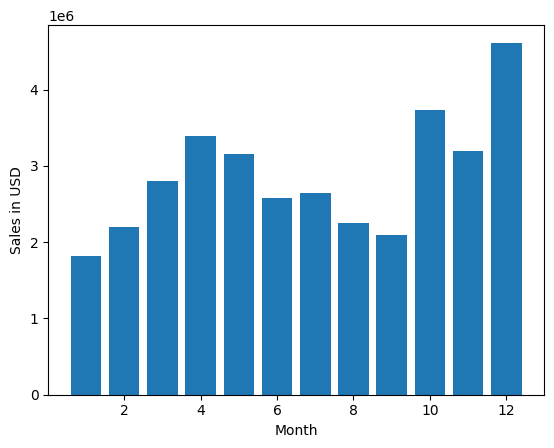

In [10]:
months = range(1, 13)
plt.bar(months, sales_per_month['Sales'])
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.show()

#### **Answer:** December (probably because of cristmas)

### **Question 2:** What city has the most sales

In [11]:
data['City'] = data['Purchase Address'].apply(lambda x: x.split(',')[1])

In [12]:
sales_per_city = data
sales_per_city = sales_per_city.groupby('City').sum()
sales_per_city = sales_per_city.reset_index(drop=False)
# sales_per_city[['City', 'Sales']]

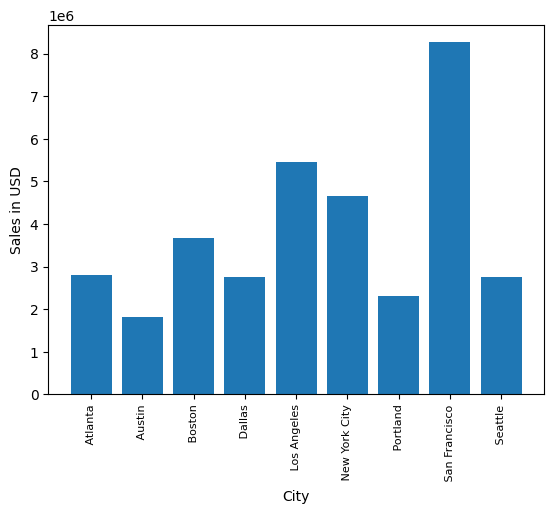

In [13]:
cities = sales_per_city['City']
plt.bar(cities, sales_per_city['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel('City')
plt.ylabel('Sales in USD')
plt.show()

##### **Answer:** San Francisco

### **Question 3:** What time should we display advertisements to maximize likelihood of customer's buying product? 

In [51]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Hour'] = data['Order Date'].dt.hour
data['Count'] = 1

In [74]:
number_of_sales_per_hour = data
number_of_sales_per_hour = number_of_sales_per_hour.groupby('Hour').count()['Count']

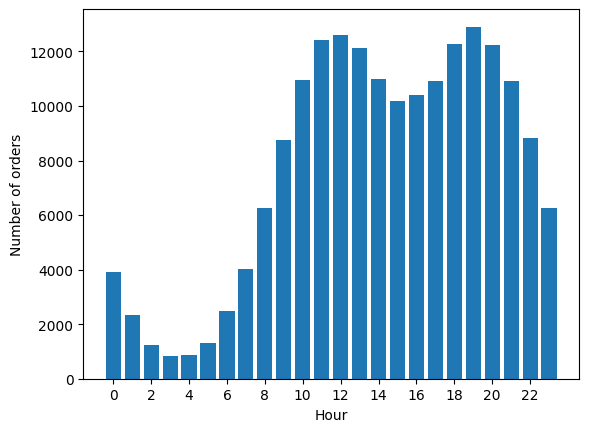

In [64]:
hours = range(0, 24)
plt.bar(hours, number_of_sales_per_hour)
plt.xlabel('Hour')
plt.xticks(hours[::2])
plt.ylabel('Number of orders')
plt.show()

##### **Answer:** Right before 11 or right before 19 hours 

### **Question 4:** What products are most often sold together? 

In [71]:
orders = data[data['Order ID'].duplicated(keep=False)]
orders['Full Order'] = orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
orders = orders[['Order ID', 'Full Order']].drop_duplicates()
orders.head(10)

/tmp/ipykernel_330643/2889235570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['Full Order'] = orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Full Order
118,223028,"Vareebadd Phone,USB-C Charging Cable,Wired Hea..."
140,223048,"Vareebadd Phone,USB-C Charging Cable"
188,223095,"Apple Airpods Headphones,AA Batteries (4-pack)"
201,223106,"Wired Headphones,Vareebadd Phone"
213,223117,"Google Phone,USB-C Charging Cable"
230,223133,"AA Batteries (4-pack),AAA Batteries (4-pack)"
238,223140,"AA Batteries (4-pack),Flatscreen TV"
243,223144,"Google Phone,USB-C Charging Cable"
310,223210,"AA Batteries (4-pack),27in FHD Monitor"
323,223221,"Wired Headphones,Macbook Pro Laptop"


In [73]:
from itertools import combinations
from collections import Counter

counter = Counter()
for row in orders['Full Order']:
    row_list = row.split(',')
    counter.update(Counter(combinations(row_list, 2)))

counter.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

##### **Answer:** Most common pairs are phone + wired headphones and phone + charging cable

### **Question 5:** What product is most? 

In [88]:
number_of_sales_per_product = data[['Product', 'Quantity Ordered']]
number_of_sales_per_product = number_of_sales_per_product.groupby('Product')
quantity_ordered = number_of_sales_per_product.sum()['Quantity Ordered']
quantity_ordered.head()

Product
20in Monitor               4129
27in 4K Gaming Monitor     6244
27in FHD Monitor           7550
34in Ultrawide Monitor     6199
AA Batteries (4-pack)     27635
Name: Quantity Ordered, dtype: int64

['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor', '34in Ultrawide Monitor', 'AA Batteries (4-pack)', 'AAA Batteries (4-pack)', 'Apple Airpods Headphones', 'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone', 'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable', 'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable', 'Vareebadd Phone', 'Wired Headphones', 'iPhone']


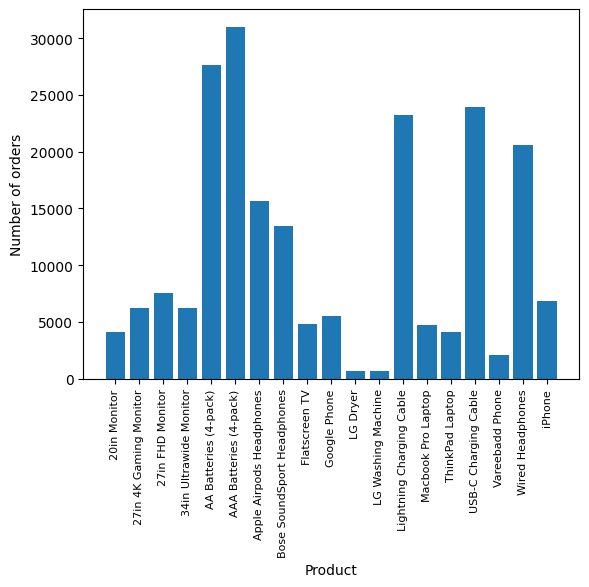

In [90]:
products = [product for product, q in number_of_sales_per_product]
print(products)

plt.bar(products, quantity_ordered)
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Number of orders')
plt.show()

##### **Answer:** Most ordered device is AAA Batteries (4-pack)

##### A bit more analytics


In [94]:
prices = data[['Product', 'Price Each']].groupby('Product').mean()['Price Each']
prices.head()

Product
20in Monitor              109.99
27in 4K Gaming Monitor    389.99
27in FHD Monitor          149.99
34in Ultrawide Monitor    379.99
AA Batteries (4-pack)       3.84
Name: Price Each, dtype: float64

/tmp/ipykernel_330643/735824024.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)


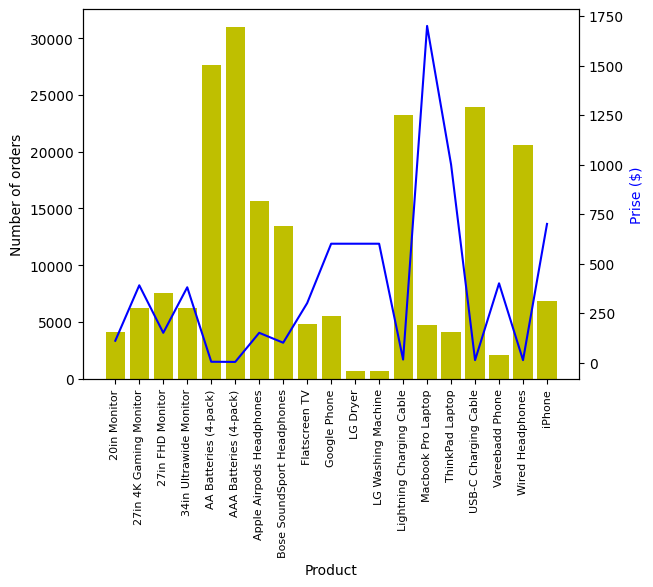

In [105]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='y')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product')
ax1.set_xticklabels(products, rotation='vertical', size=8)
ax1.set_ylabel('Number of orders')

ax2.set_ylabel("Prise ($)", color='b')

plt.show()